In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairam40011","key":"3fbc16f28f83085e473dd65e4106d1b1"}'}

In [3]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [4]:
!kaggle datasets download -d swaroopkml/cifar10-pngs-in-folders

 96% 135M/140M [00:02<00:00, 53.6MB/s]
100% 140M/140M [00:02<00:00, 58.3MB/s]


In [ ]:
! unzip cifar10-pngs-in-folders.zip 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model=Sequential([      
          Conv2D(25,(3,3),input_shape=(32,32,3),activation='relu'), 
          Dropout(0.2),
          MaxPooling2D(2,2),
          Dropout(0.2),
          Conv2D(50,(3,3),activation='relu'), 
          Dropout(0.2),  
          MaxPooling2D(2,2), 
          Dropout(0.2),
          Conv2D(75,(3,3),activation='relu'), 
          Dropout(0.2),
          MaxPooling2D(2,2), 
          Dropout(0.2),
          Flatten(),
          Dropout(0.2),
          Dense(100,activation='relu'),
          Dropout(0.2),
          Dense(10,activation='softmax')                      
])
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 25)        700       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 25)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 25)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 50)        11300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 50)          0

In [8]:
!pip install visualkeras

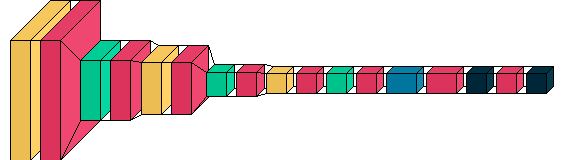

In [9]:
import visualkeras
visualkeras.layered_view(model)

In [10]:
TRAINING_DIR = 'cifar10/cifar10/train'
train_datagen = ImageDataGenerator(rescale=1/255.0)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(32,32)
                                                        
)

VALIDATION_DIR = 'cifar10/cifar10/test'
validation_datagen = ImageDataGenerator(rescale=1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(32,32)
                                                        
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [11]:
train_generator[0][0][0][0]

array([[0.14117648, 0.14509805, 0.1254902 ],
       [0.1764706 , 0.16862746, 0.13333334],
       [0.15686275, 0.13725491, 0.11764707],
       [0.15294118, 0.11764707, 0.1254902 ],
       [0.16470589, 0.13333334, 0.10980393],
       [0.14901961, 0.12156864, 0.09411766],
       [0.16470589, 0.14117648, 0.13725491],
       [0.15686275, 0.14117648, 0.15686275],
       [0.14117648, 0.13333334, 0.15686275],
       [0.15294118, 0.14901961, 0.13725491],
       [0.14117648, 0.17254902, 0.10196079],
       [0.14117648, 0.20784315, 0.10588236],
       [0.13725491, 0.20784315, 0.12941177],
       [0.16862746, 0.21176472, 0.18823531],
       [0.13333334, 0.18823531, 0.13333334],
       [0.12156864, 0.18431373, 0.1137255 ],
       [0.14117648, 0.19607845, 0.14901961],
       [0.14901961, 0.19607845, 0.16862746],
       [0.13725491, 0.1764706 , 0.16862746],
       [0.14509805, 0.16470589, 0.15686275],
       [0.20784315, 0.19215688, 0.19215688],
       [0.2627451 , 0.21960786, 0.227451  ],
       [0.

In [12]:
history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              batch_size=200,
                              validation_data=validation_generator)

Epoch 1/5
250/250 [==============================] - 84s 333ms/step - loss: 2.0863 - accuracy: 0.2084 - val_loss: 1.7163 - val_accuracy: 0.4368
Epoch 2/5
250/250 [==============================] - 82s 330ms/step - loss: 1.5959 - accuracy: 0.4075 - val_loss: 1.5031 - val_accuracy: 0.5134
Epoch 3/5
250/250 [==============================] - 82s 329ms/step - loss: 1.4472 - accuracy: 0.4720 - val_loss: 1.4345 - val_accuracy: 0.5303
Epoch 4/5
250/250 [==============================] - 82s 329ms/step - loss: 1.3662 - accuracy: 0.5037 - val_loss: 1.3208 - val_accuracy: 0.5755
Epoch 5/5
250/250 [==============================] - 82s 329ms/step - loss: 1.3077 - accuracy: 0.5283 - val_loss: 1.2775 - val_accuracy: 0.5805


Saving download.jpg to download.jpg
download.jpg is a truck


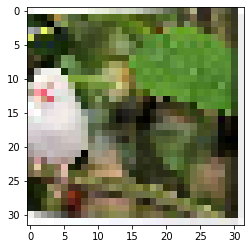

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(32,32,3))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0][0]==1:
        print(fn + " is a Airplane")
    elif classes[0][1]==1:
        print(fn + " is a automobile")
    elif classes[0][2]==1:
        print(fn + " is a bird")  
    elif classes[0][3]==1:
        print(fn + " is a cat")
    elif classes[0][4]==1:
        print(fn + " is a deer")
    elif classes[0][5]==1:
        print(fn + " is a dog")
    elif classes[0][6]==1:
        print(fn + " is a frog")  
    elif classes[0][7]==1:
        print(fn + " is a hourse")
    elif classes[0][8]==1:
        print(fn + " is a ship")
    else:
        print(fn + " is a truck")  

# Agumentaion

In [14]:
TRAINING_DIR = 'cifar10/cifar10/train'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(32,32)
)

VALIDATION_DIR = 'cifar10/cifar10/train'
validation_datagen = ImageDataGenerator(rescale=1/255.0)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(32,32)
)


Found 50000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.


In [15]:
model=Sequential([      
          Conv2D(25,(3,3),input_shape=(32,32,3),activation='relu'), 
          Dropout(0.2),
          MaxPooling2D(2,2),
          Dropout(0.2),
          Conv2D(50,(3,3),activation='relu'), 
          Dropout(0.2),  
          MaxPooling2D(2,2), 
          Dropout(0.2),
          Conv2D(75,(3,3),activation='relu'), 
          Dropout(0.2),
          MaxPooling2D(2,2), 
          Dropout(0.2),
          Flatten(),
          Dropout(0.2),
          Dense(100,activation='relu'),
          Dropout(0.2),
          Dense(10,activation='softmax')                      
])
model.compile(optimizer=Adam(lr=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 25)        700       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 25)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 25)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 25)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 50)        11300     
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 50)         

In [16]:
history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
250/250 [==============================] - 139s 553ms/step - loss: 2.1625 - accuracy: 0.1755 - val_loss: 1.8910 - val_accuracy: 0.3715
Epoch 2/5
250/250 [==============================] - 126s 505ms/step - loss: 1.8491 - accuracy: 0.3081 - val_loss: 1.7323 - val_accuracy: 0.4068
Epoch 3/5
250/250 [==============================] - 127s 508ms/step - loss: 1.7683 - accuracy: 0.3504 - val_loss: 1.6362 - val_accuracy: 0.4496
Epoch 4/5
250/250 [==============================] - 127s 507ms/step - loss: 1.6988 - accuracy: 0.3770 - val_loss: 1.5349 - val_accuracy: 0.4623
Epoch 5/5
250/250 [==============================] - 128s 511ms/step - loss: 1.6472 - accuracy: 0.3947 - val_loss: 1.5186 - val_accuracy: 0.4500


Saving download.jpg to download (1).jpg
download.jpg is a truck


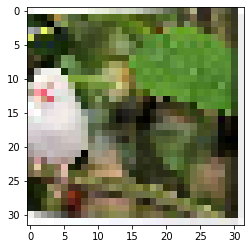

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(32,32,3))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0][0]==1:
        print(fn + " is a Airplane")
    elif classes[0][1]==1:
        print(fn + " is a automobile")
    elif classes[0][2]==1:
        print(fn + " is a bird")  
    elif classes[0][3]==1:
        print(fn + " is a cat")
    elif classes[0][4]==1:
        print(fn + " is a deer")
    elif classes[0][5]==1:
        print(fn + " is a dog")
    elif classes[0][6]==1:
        print(fn + " is a frog")  
    elif classes[0][7]==1:
        print(fn + " is a hourse")
    elif classes[0][8]==1:
        print(fn + " is a ship")
    else:
        print(fn + " is a truck")  

# Transfer Learning

In [22]:
import tensorflow

In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (160,160,3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()



--2021-02-20 06:44:41--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   117MB/s    in 0.7s    

2021-02-20 06:44:42 (117 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0          

In [33]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 768)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [35]:
# Define a Callback class that stops training once accuracy reaches 94.0%
class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [36]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024,activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(10,activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 79, 79, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 79, 79, 32)   96          conv2d_194[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 79, 79, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [37]:
import visualkeras

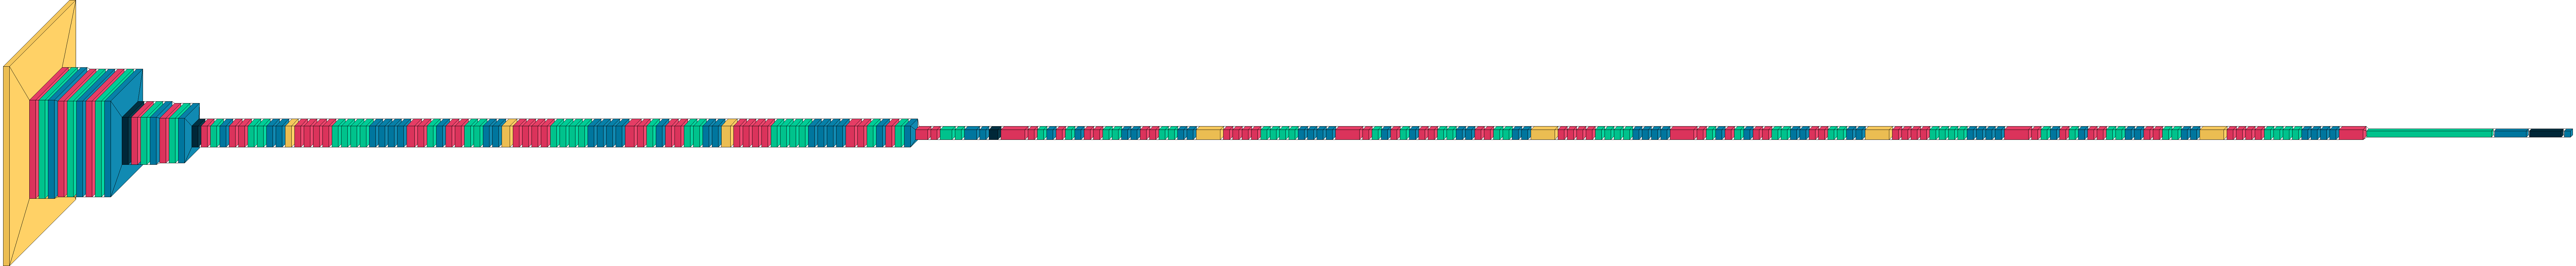

In [38]:
visualkeras.layered_view(model)

In [39]:
TRAINING_DIR = 'cifar10/cifar10/train'
train_datagen = ImageDataGenerator(
      rescale=5,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(160,160)
)

VALIDATION_DIR = 'cifar10/cifar10/train'
validation_datagen = ImageDataGenerator(rescale=5)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=200,
                                                    class_mode='categorical',
                                                    target_size=(160,160)
)

Found 50000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 94% accuracy

callbacks = myCallback()
history = model.fit(train_generator,validation_data=validation_generator,
                             epochs=2,verbose=1,
                             callbacks=[callbacks])

Epoch 1/5
250/250 [==============================] - 4561s 18s/step - loss: 158.6497 - accuracy: 0.1239 - val_loss: 2.3017 - val_accuracy: 0.1031
Epoch 2/5
 29/250 [==>...........................] - ETA: 36:36 - loss: 2.3057 - accuracy: 0.0977

# CNN hypertuning

In [ ]:
len(train_generator[0][0][0][0])

In [ ]:
len(validation_generator[0][0][0][0])

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow 
from keras.utils import np_utils
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import kerastuner as kt

In [ ]:
input_shape=(32,32,3)
no_classes=10
loss_function=categorical_crossentropy
validation_split=0.2

In [ ]:
# MODEL BUILDING FUNCTION
def build_model():
  # Create the model
  model = Sequential()
  
  model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(no_classes, activation='softmax'))

  # Display a model summary
  model.summary()

  # Compile the model
  model.compile(loss=loss_function,
                optimizer='Adam',
                metrics=['accuracy'])
  
  # Return the model
  return model